
Kim Thach

**ECGR 5090 - C01**

*800793249*

https://github.com/thachkse/Intro-to-ML/blob/main/HW_4/HW4_SVM

1. SVM & PCA
2. SVR Regression
                                                                

# Import Libraries and Data

Import required libraries and data needed.


In [1]:
# Initialize some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


In [2]:
# Read in Cancer dataset
df = load_breast_cancer()
datab = df.data
datab.shape
data_in = pd.DataFrame(datab)


## Clean Data


In [3]:
b_labels = df.target
b_labels.shape
#
labels = np.reshape(b_labels,(569,1))
finalb_data = np.concatenate([datab,labels],axis=1)
#
b_dataset = pd.DataFrame(finalb_data)
features = df.feature_names
# 
features_labels = np.append(features,'label')
b_dataset.columns = features_labels
b_dataset.head()

# If we don't want to work with binary data
#b_dataset['label'].replace(0,'Benign',inplace=True)
#b_dataset['label'].replace(1,'Malignant',inplace=True)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Problem 1

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

1. Identify the optimum number of K, principal components that achieve the highest classification accuracy. 
2. Plot your classification accuracy, precision, and recall over a different number of Ks. 
3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
4. Compare your results against the logistic regression that you have done in homework 3.

Make sure to explain and elaborate your results.


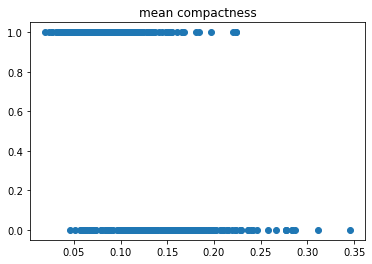

In [4]:
# Plot the current dataset Plotting random feature.
plt.figure()
plt.title(features[5])
plt.scatter(b_dataset[features[5]],b_dataset.label)

In [5]:

b_dataset['label'].replace(0,'Benign',inplace=True)
b_dataset['label'].replace(1,'Malignant',inplace=True)

from sklearn.preprocessing import StandardScaler 

# Separating out the features 
x = b_dataset.loc[:, features].values 
# Separating out the target 
y = b_dataset['label']


# Standardizing the features 
x = StandardScaler().fit_transform(x) 

In [6]:
# Perform PCA on dataset. 
from sklearn.decomposition import PCA

pca=(PCA(n_components = 2))
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data=principalComponents, columns = ['principal component 1','principal component 2'])
finalDF = pd.concat([principalDF, b_dataset[['label']]], axis = 1)

data = pd.DataFrame.copy(finalDF)


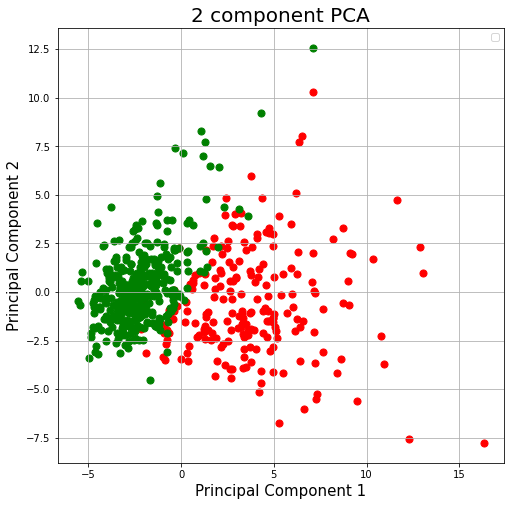

In [7]:
fig = plt.figure(figsize = (8,8)) 

ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 
labels = ['Benign','Malignant'] 
colors = ['r', 'g'] 
ax.legend(labels) 

for labels, color in zip(labels,colors): 
    indicesToKeep = finalDF['label'] == labels
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'] 
               , finalDF.loc[indicesToKeep, 'principal component 2'] 
               , c = color 
               , s = 50) 

ax.grid() 

In [8]:
y = finalDF['label']
y.replace('Benign',0,inplace=True)
y.replace('Malignant',1,inplace=True)

fx = ['principal component 1','principal component 2']
x = finalDF[fx]
print(x)

     principal component 1  principal component 2
0                 9.192837               1.948583
1                 2.387802              -3.768172
2                 5.733896              -1.075174
3                 7.122953              10.275589
4                 3.935302              -1.948072
..                     ...                    ...
564               6.439315              -3.576817
565               3.793382              -3.584048
566               1.256179              -1.902297
567              10.374794               1.672010
568              -5.475243              -0.670637

[569 rows x 2 columns]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)


In [10]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(x_train,y_train)


SVC(C=10000000000.0, kernel='linear')

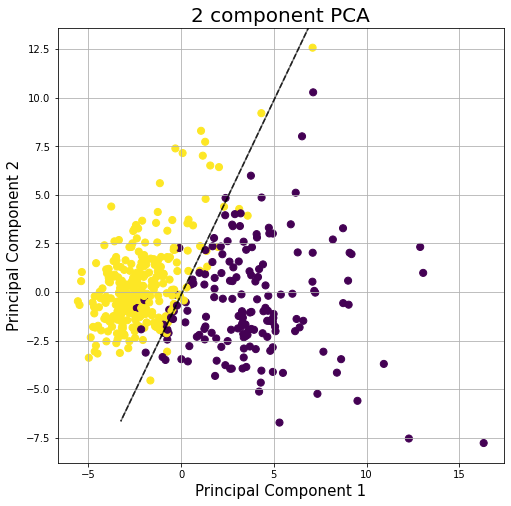

In [11]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model 
    x1 = np.linspace(xlim[0],xlim[1],30)
    y1 = np.linspace(xlim[0],xlim[1],30)
    Y1, X1 = np.meshgrid(y1,x1)
    xy1 = np.vstack([X1.ravel(), Y1.ravel()]).T
    P = model.decision_function(xy1).reshape(X1.shape)
    
    # plot decision boundary and margins
    ax.contour(X1,Y1,P, colors='k', levels=[-1,0,1], alpha=0.5,linestyles=['--','-','--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, linewidth=1, facecolors='none');
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    
fig = plt.figure(figsize = (8,8)) 

ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 

ax.scatter(x_train['principal component 1'] 
           , x_train['principal component 2'] 
           , c = y_train
           , s = 50) 
ax.grid() 


plot_svc_decision_function(model);

In [12]:
Y_pred = model.predict(x_test)

In [13]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,Y_pred))
print("Precision:",metrics.precision_score(y_test,Y_pred))
print("Recall:",metrics.recall_score(y_test,Y_pred))

Accuracy: 0.9912280701754386
Precision: 0.9861111111111112
Recall: 1.0


In [14]:
def pca_iters(K,data):
    pca = PCA(n_components = K) 
    principalComponents = pca.fit_transform(data) 
    principalDf = pd.DataFrame(data = principalComponents)
    finalDF = pd.concat([principalDf, b_dataset[['label']]], axis = 1)
        
    return finalDF      


In [15]:
# Separating out the features 
x = b_dataset.loc[:, features].values 
# Separating out the target 
y = b_dataset['label']
# Standardizing the features 
x = StandardScaler().fit_transform(x) 
finalDF = pca_iters(10,x)
print(finalDF)


             0          1         2         3         4         5         6  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411425  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668167   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429910   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936212   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716327   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192759   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952   

            7         8         9      label  
0   

In [16]:
iterations = 30
accu = np.zeros(iterations)
prec = np.zeros(iterations)
reca = np.zeros(iterations)
arrx = np.zeros((3,30))
arry = np.zeros((3,30))
arrz = np.zeros((3,30))
xstr = ['linear','rbf','poly']

In [17]:
def iterx(nx,iterations):
    h = 1
    for i in range(iterations):
        if i > 1:
            # Separating out the features 
            x = b_dataset.loc[:, features].values 
            # Separating out the target 
            y = b_dataset['label']
            # Standardizing the features 
            x = StandardScaler().fit_transform(x) 

            finalDF = pca_iters(i,x)
            y = finalDF['label']
            y.replace('Benign',0,inplace=True)
            y.replace('Malignant',1,inplace=True)
            sizedf = finalDF.shape
            x = finalDF.loc[:,0:sizedf[1]-2]
            x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)

            model = SVC(kernel=nx)
            model.fit(x_train,y_train)

            Y_pred = model.predict(x_test)

            accu[h] = np.array(metrics.accuracy_score(y_test,Y_pred))
            prec[h] = np.array(metrics.precision_score(y_test,Y_pred))
            reca[h] = np.array(metrics.recall_score(y_test,Y_pred))
            
            h = h + 1
            
            
            return accu, prec,reca

        

In [18]:
num = 0
for n in xstr:
    accu, prec, reca = iterx(n,iterations)
    arrx[num,:] = np.array(accu)
    arry[num,:] = np.array(prec)
    arrz[num,:] = np.array(reca)
    num = num + 1

Text(0, 0.5, 'Score')

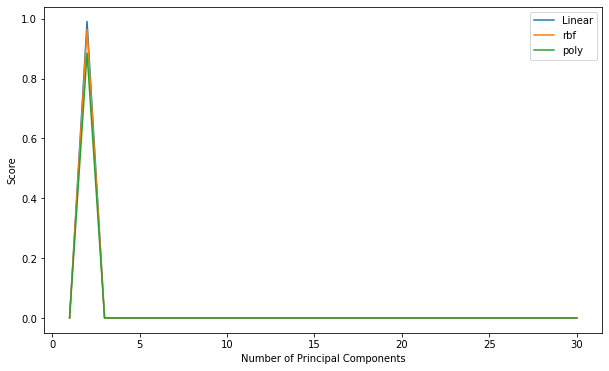

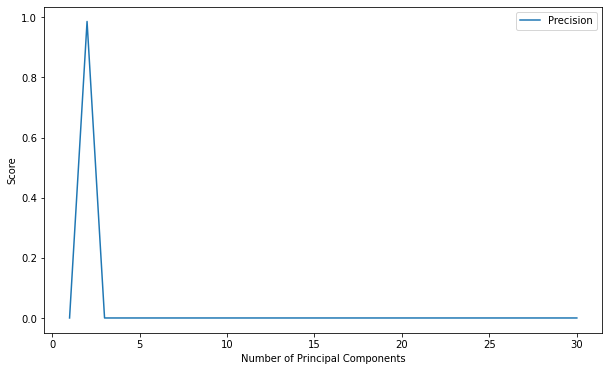

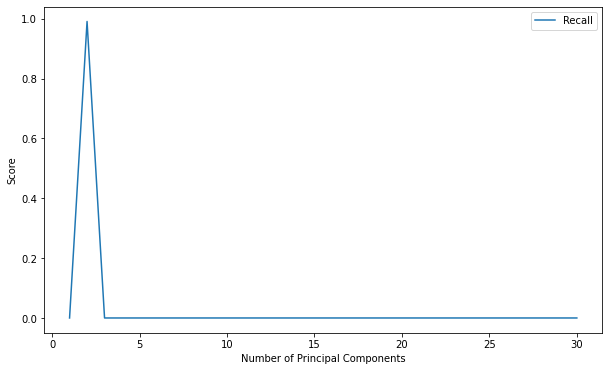

In [19]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,iterations+1),arrx[0,:])
plt.plot(range(1,iterations+1),arrx[1,:])
plt.plot(range(1,iterations+1),arrx[2,:])
plt.legend(['Linear','rbf','poly'])
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')

plt.figure(figsize = (10, 6))
plt.plot(range(1,iterations+1),arry[0,:])
plt.legend(['Precision'])
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')


plt.figure(figsize = (10, 6))
plt.plot(range(1,iterations+1),arrx[0,:])
plt.legend(['Recall'])
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')



https://github.com/thachkse/Intro-to-ML/blob/main/HW_4


In [20]:
print(arrx)

[[0.         0.99122807 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.96491228 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.88596491 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]]


## Conclusion

The linear model had the best results.

# Problem 2

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

* Plot your regression model for SVR similar to the sample code provided on Canvas.
* Compare your results against linear regression with regularization loss that you already did in homework1. 
* Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy. 
* Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

Make sure to explain and elaborate your results.

In [21]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
#varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [23]:
def binary_map(x):
 return x.map({'yes': 1, "no": 0})


In [24]:
housing[varlist] = housing[varlist].apply(binary_map)
print(housing)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [25]:
from sklearn.svm import SVR 

 
# ############################################################################# 
# Generate sample data 
varx = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']


XDF = housing[varx]
stack = StandardScaler().fit_transform(XDF) 

X = stack[:,1]
y = stack[:,0]

# ############################################################################# 
# Add noise to targets 
#y[::5] += 3 * (0.5 - np.random.rand(8)) 
 
# ############################################################################# 
# Fit regression model 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_lin = SVR(kernel='linear', C=1e3) 
svr_poly = SVR(kernel='poly', C=1e3, degree=2) 
y_rbf = svr_rbf.fit(X, y).predict(X) 
y_lin = svr_lin.fit(X, y).predict(X) 
y_poly = svr_poly.fit(X, y).predict(X) 
 
# ############################################################################# 
# Look at the results 
lw = 2 
plt.scatter(X, y, color='darkorange', label='data') 
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model') 
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model') 
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model') 
plt.xlabel('data') 
plt.ylabel('target') 
plt.title('Support Vector Regression') 
plt.legend() 
plt.show() 

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.04672629e+00  1.75700953e+00  2.21823241e+00  1.08362412e+00
  1.04672629e+00  1.08362412e+00  1.58174483e+00  5.09626319e+00
  1.36035785e+00  2.76484076e-01  3.71259454e+00  3.91789797e-01
  6.45462381e-01 -7.61267407e-01  1.22199098e+00  3.91789797e-01
  6.68523525e-01  1.54484700e+00 -2.53922238e-01  5.85503407e-01
 -3.83064644e-01  9.24502225e-01  1.33729670e+00 -2.72371153e-01
  1.68321386e+00  6.40850153e-01  3.91789797e-01  1.71780558e+00
  1.29117442e+00  1.61178356e-01  1.07209355e+00  8.53012678e-01
 -1.24779831e-01  3.73340881e-01  7.79217017e-01  8.53012678e-01
  1.07532211e+00  1.77545844e+00  3.91789797e-01  3.91789797e-01
  6.45462381e-01  5.57830034e-01  6.13176780e-01  3.91789797e-01
  3.91789797e-01  3.91789797e-01  3.91789797e-01  6.68523525e-01
 -3.92289102e-01  1.05595075e+00  1.05595075e+00  5.41687233e-01
  3.91789797e-01 -2.49652752e-04  3.91789797e-01  3.91789797e-01
  2.90084227e+00  1.77545844e+00  1.16664424e+00  3.91789797e-01
  3.91789797e-01  1.72011170e+00  5.02483288e-01  5.57830034e-01
  2.77861821e+00  1.72011170e+00  3.71259454e+00  1.17586870e+00
  3.91789797e-01  3.20063714e+00 -5.30655966e-01  3.91789797e-01
 -6.02086273e-02  6.68523525e-01 -5.12207051e-01 -4.10738017e-01
  5.85503407e-01  6.22401237e-01  2.53422932e-01  3.91789797e-01
  3.91789797e-01 -5.30655966e-01  2.46729276e+00  3.91789797e-01
 -6.41349458e-01  1.42954128e+00  7.00809127e-01 -5.49104882e-01
  1.04211406e+00  1.58174483e+00 -6.94330850e-02  7.37706958e-01
 -1.61677661e-01  9.45257254e-01  3.91789797e-01 -4.84533678e-01
  1.77545844e+00  5.76278949e-01  6.68523525e-01  3.91789797e-01
  6.68523525e-01  1.61178356e-01  1.61178356e-01  5.53217805e-01
  1.61178356e-01 -3.00044526e-01  1.38117212e-01  5.85503407e-01
 -8.81185356e-01  6.75441869e-01  6.68523525e-01  1.48581047e+00
 -3.92289102e-01  2.06141663e+00  7.60768102e-01  1.31423556e+00
  8.06890390e-01 -6.69022831e-01  5.85503407e-01  8.62237136e-01
  6.40850153e-01  9.59555164e-01  5.08940408e-01  1.00060400e+00
  6.33931809e-01  4.81952946e+00  9.26808339e-01  6.22401237e-01
  1.61178356e-01  2.91006673e+00 -1.61677661e-01  3.12459461e-01
  2.28114913e-02 -1.61677661e-01  8.53012678e-01  3.91789797e-01
  1.15056068e-01 -2.35473322e-01 -6.94330850e-02  5.57830034e-01
  2.99545220e-01  6.96196898e-01  2.46729276e+00 -1.61677661e-01
 -2.07799949e-01 -6.94330850e-02  2.46729276e+00  1.61178356e-01
  5.57830034e-01  6.68523525e-01 -6.70677309e-03 -3.46166814e-01
  1.15056068e-01 -8.53511984e-01 -6.92083975e-01  4.37912085e-01
  8.06890390e-01 -1.07628264e+00  1.30501110e+00 -9.22695416e-01
  4.88646602e-01  4.37912085e-01  6.68523525e-01  7.72298674e-01
  7.19258042e-01  5.99340093e-01  1.22199098e+00 -2.53922238e-01
 -4.10738017e-01  6.40850153e-01  1.61178356e-01  2.36075028e+00
  1.49872471e+00  6.89337795e-02 -6.22900543e-01  2.14443675e+00
  1.55407146e+00  4.14850941e-01  8.92216623e-01 -9.08858729e-01
 -3.00044526e-01  9.45257254e-01 -8.02777467e-01  1.30501110e+00
 -9.91878848e-01 -9.91878848e-01  2.88700559e+00  4.37912085e-01
  2.62647390e-01 -7.42818492e-01  1.12974641e+00  2.55953734e+00
  6.68523525e-01 -1.61677661e-01  1.38341899e+00 -3.41554585e-01
  1.16941157e+00 -1.08412342e+00  3.67806207e-01 -4.38411390e-01
 -2.90820068e-01 -4.86839793e-01 -4.75309221e-01  1.15056068e-01
 -1.75514348e-01  5.30156661e-01  2.99545220e-01 -9.91878848e-01
 -1.00571553e+00  7.23870271e-01 -2.32705985e-01  3.57422768e+00
 -7.98165238e-01 -7.17391994e-02 -3.69227958e-01 -4.56860305e-01
  4.10238712e-01  7.89363920e-01 -1.54759318e-01  8.53012678e-01
  1.36035785e+00 -7.98165238e-01  1.85202144e+00  5.39842341e-01
  2.34737481e+00  5.94727864e-01  8.97480488e-03  3.91789797e-01
 -7.01308433e-01  2.08309410e+00  1.15056068e-01 -3.83064644e-01
 -6.48267801e-01 -4.56860305e-01 -5.86002712e-01  2.44198474e-01
 -1.05183782e+00 -6.48208562e-02 -2.95432297e-01 -5.30655966e-01
 -6.04451628e-01 -6.41349458e-01 -6.96696204e-01 -1.19942914e+00
  7.81582371e-02  9.66071524e-02 -7.52042950e-01  1.49872471e+00
 -4.84533678e-01 -7.40453138e-02 -7.56655178e-01 -7.84328551e-01
  2.17211012e+00 -7.52042950e-01 -2.95432297e-01  3.38749165e-01
 -5.30655966e-01  1.42954128e+00 -5.12207051e-01  5.57830034e-01
 -9.17160741e-01 -7.56655178e-01 -6.45961687e-01 -5.45415099e-01
 -1.15555373e-01 -1.04722559e+00 -1.24779831e-01 -1.06330915e-01
 -9.24942291e-02 -5.76778255e-01 -3.00044526e-01 -1.49691790e+00
 -4.96064250e-01 -7.61267407e-01  5.99340093e-01 -5.15896834e-01
 -3.46166814e-01  2.40272156e+00 -8.07389695e-01  5.57830034e-01
  5.57830034e-01 -3.00044526e-01 -1.37238773e+00 -3.64615729e-01
  1.20815430e+00  6.91584669e-01 -1.09011932e+00  1.61178356e-01
 -5.09841697e-02  3.22606364e-01 -1.17175577e+00 -1.01355632e+00
 -1.10856824e+00 -3.41554585e-01 -5.30655966e-01 -1.30320429e+00
 -2.53922238e-01 -6.96696204e-01  2.99545220e-01  8.53012678e-01
 -4.94219359e-01 -7.52042950e-01 -1.38622441e+00 -3.00044526e-01
  1.42954128e+00 -7.84328551e-01 -1.43228746e-01 -4.93758136e-01
 -5.09439714e-01 -2.39163105e-01  3.84871453e-01  4.19463169e-01
 -7.15145119e-01 -6.78247289e-01 -5.12207051e-01  2.07300644e-01
  3.45667508e-01 -7.31228680e-02 -3.73840187e-01 -9.91878848e-01
 -3.83064644e-01 -7.01308433e-01 -7.79716322e-01  1.15056068e-01
 -3.00044526e-01 -7.79716322e-01 -4.84533678e-01  6.13176780e-01
 -3.00044526e-01 -5.49104882e-01 -5.07594822e-01  9.72930627e-01
  1.61178356e-01 -9.91878848e-01 -8.58124212e-01 -6.15520977e-01
  1.35113339e+00 -1.38622441e+00 -6.32125000e-01 -9.08858729e-01
  6.89337795e-02 -9.08858729e-01  9.23118556e-01 -4.93758136e-01
 -5.99839399e-01 -1.44618339e+00 -1.37192650e+00 -8.30450839e-01
 -9.22695416e-01 -1.52453204e-01 -7.98165238e-01 -7.15145119e-01
  3.13381907e-01 -1.05829494e+00  1.49872471e+00  1.42954128e+00
 -1.21326583e+00  8.20727076e-01 -7.70491865e-01 -7.15145119e-01
 -5.12207051e-01  4.01014254e-01 -5.07594822e-01 -7.22524685e-01
 -9.36532102e-01  1.38117212e-01 -7.01308433e-01 -7.01308433e-01
  2.25749559e-01 -7.15145119e-01 -4.01513560e-01 -7.28981806e-01
 -9.08858729e-01 -9.91878848e-01 -7.52042950e-01  3.73340881e-01
 -4.70696992e-01 -1.06106228e+00 -1.32626544e+00 -7.52042950e-01
 -3.00044526e-01 -5.30655966e-01 -9.22695416e-01 -3.00044526e-01
 -3.00044526e-01 -6.96696204e-01 -5.99839399e-01 -4.19962475e-01
 -6.92083975e-01 -2.53922238e-01 -1.39083664e+00 -9.75274824e-01
 -5.35268195e-01  1.04857118e+00 -7.70491865e-01 -7.15145119e-01
 -6.96696204e-01  3.45667508e-01 -9.36532102e-01  1.01444069e+00
 -7.55732733e-01  2.00606988e+00  3.36443051e-01  3.59452149e+00
 -1.15555373e-01 -9.64205475e-01  7.81582371e-02 -1.38622441e+00
 -5.30655966e-01 -9.06552615e-01 -5.99839399e-01 -1.38622441e+00
 -1.17175577e+00 -1.47616287e+00 -5.12207051e-01 -1.68596004e-01
 -7.84328551e-01 -6.96696204e-01 -7.61267407e-01 -8.78820002e-02
 -4.75309221e-01 -1.84738805e-01 -6.59798373e-01 -6.45961687e-01
 -9.45756560e-01 -9.06552615e-01 -1.13024571e+00 -1.38622441e+00
 -5.12207051e-01 -1.73208233e-01 -1.22249029e+00 -9.08858729e-01
  4.19463169e-01 -7.70491865e-01 -6.26590326e-01 -5.12207051e-01
 -1.38622441e+00  3.36443051e-01 -3.00044526e-01 -5.62941568e-01
 -6.96696204e-01 -3.60003500e-01 -1.13762528e+00 -3.83064644e-01
 -9.36532102e-01 -7.84328551e-01 -5.37113087e-01 -7.61267407e-01
 -4.86839793e-01 -1.61452974e+00 -7.84328551e-01  7.37706958e-01
  1.77545844e+00 -9.60054469e-01 -3.00044526e-01  1.58872241e-01
 -1.26953502e+00 -9.91878848e-01 -5.99839399e-01 -7.61267407e-01
  1.36035785e+00 -8.78820002e-02 -1.37930607e+00 -9.50368789e-01
 -3.00044526e-01 -6.22900543e-01 -9.50368789e-01 -8.81185356e-01
 -1.06798062e+00 -2.53922238e-01 -3.43801460e-02 -6.45961687e-01
 -7.01308433e-01  1.33729670e+00 -3.68305512e-01 -9.91878848e-01
  3.22606364e-01 -8.78820002e-02 -7.15145119e-01 -6.87471746e-01
 -7.70491865e-01 -1.13024571e+00 -9.22695416e-01  6.75441869e-01
 -9.73429933e-01 -7.01308433e-01  3.91789797e-01  1.15056068e-01
  2.28114913e-02 -8.53511984e-01 -3.69227958e-01 -1.15791909e+00
 -1.15330686e+00 -5.49104882e-01  7.60768102e-01 -5.30655966e-01
 -5.30655966e-01 -5.61096677e-01 -1.45310173e+00 -7.01308433e-01
 -1.08412342e+00 -1.25477589e+00 -7.70491865e-01 -5.30655966e-01
 -9.06552615e-01 -5.30655966e-01 -1.03338891e+00 -7.15145119e-01
 -3.46166814e-01 -7.15145119e-01 -1.04722559e+00 -9.08858729e-01
 -9.91878848e-01 -3.46166814e-01 -9.91878848e-01 -8.95022043e-01
 -8.81185356e-01 -9.91878848e-01 -7.61267407e-01 -1.43228746e-01
  1.17586870e+00 -6.99002318e-01 -1.23402086e+00 -1.09011932e+00
 -8.70116007e-01 -6.96696204e-01 -9.08858729e-01 -1.52874228e+00
 -5.44492653e-01 -5.44492653e-01 -1.47616287e+00  6.89337795e-02
 -9.91878848e-01 -1.26861258e+00 -9.91878848e-01 -8.25838611e-01
 -7.98165238e-01 -1.59146859e+00 -6.92545198e-01 -9.96491077e-01
 -9.91878848e-01 -1.26861258e+00 -7.05920661e-01 -1.03338891e+00
 -5.99839399e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.